In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [11]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [12]:
df = pd.DataFrame()
df["reviews"] = reviews

In [13]:
df.head()

,reviews
0,Not Verified | While BA may have made some p...
1,✅ Trip Verified | British Airways new Club Sui...
2,"✅ Trip Verified | Four very pleasant, on time..."
3,Not Verified | We travel extensively over 25...
4,✅ Trip Verified | Flight delayed an hour due ...


In [14]:
df.to_csv("BA_reviews.csv", index = False)

In [8]:
df = pd.read_csv("BA_reviews.csv")

In [15]:
df.head()

,reviews
0,Not Verified | While BA may have made some p...
1,✅ Trip Verified | British Airways new Club Sui...
2,"✅ Trip Verified | Four very pleasant, on time..."
3,Not Verified | We travel extensively over 25...
4,✅ Trip Verified | Flight delayed an hour due ...


In [4]:
df.isnull().sum()

Unnamed: 0    0
reviews       0
dtype: int64

In [16]:
# Mengidentifikasi ulasan terverifikasi dan tidak terverifikasi
verified_reviews = df[df['reviews'].str.contains('✅ Trip Verified')]
not_verified_reviews = df[~df['reviews'].str.contains('✅ Trip Verified')]

In [17]:
print(f"Total verified reviews: {verified_reviews.shape[0]}")
print(f"Total not verified reviews: {not_verified_reviews.shape[0]}")

Total verified reviews: 758
Total not verified reviews: 242


In [18]:
from textblob import TextBlob

In [31]:
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Menambahkan kolom sentimen pada masing-masing DataFrame
verified_reviews.loc[:, 'Sentiment'] = verified_reviews['reviews'].apply(get_sentiment)
not_verified_reviews.loc[:, 'Sentiment'] = not_verified_reviews['reviews'].apply(get_sentiment)

# Distribusi sentimen
verified_sentiment_distribution = verified_reviews['Sentiment'].value_counts()
not_verified_sentiment_distribution = not_verified_reviews['Sentiment'].value_counts()

# Menentukan batas maksimum y-axis
max_y = max(verified_sentiment_distribution.max(), not_verified_sentiment_distribution.max())

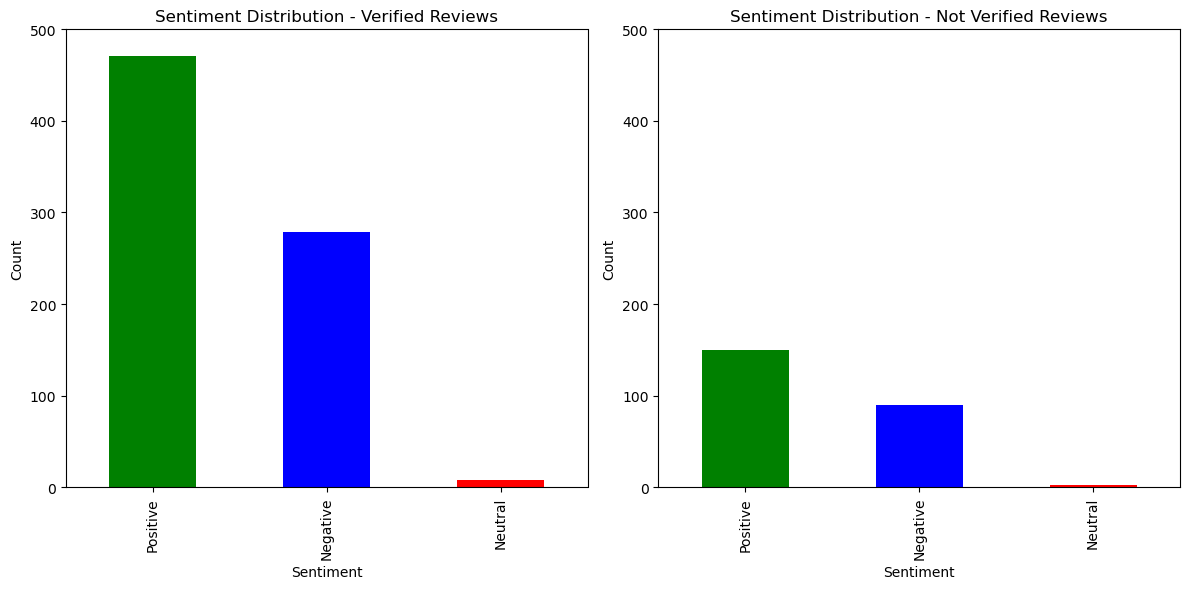

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
verified_sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution - Verified Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim(0, 500)

plt.subplot(1, 2, 2)
not_verified_sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution - Not Verified Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim(0, 500)

plt.tight_layout()
plt.show()